In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
df = pd.read_csv('/content/manufacturing_dataset_1000_samples (1).csv')

In [53]:
df

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,0.474090,1.359149,-0.856562,0.728050,1.708997,1.843582,-1.040282,-0.708301,0.838407,Evening,Type_B,Economy,Thursday,-0.951369,-0.627335,-0.746396,0.783359,36.5
1,-0.168139,0.874835,-0.161894,0.901726,-0.491176,-0.124033,-0.270824,-0.887005,0.463560,Night,Type_A,Standard,Wednesday,-0.841954,0.088037,-0.896034,0.164471,29.9
2,0.624221,-0.011937,-1.910541,-1.052130,0.765278,0.859775,-0.937688,-0.766653,-0.223658,Day,Type_A,Standard,Monday,0.131838,-2.115771,-0.757907,0.993065,56.9
3,1.499987,-0.734998,0.401027,0.510955,-1.565775,1.114836,0.344743,-0.803123,-0.098710,Evening,Type_A,Premium,Saturday,1.200456,0.526491,-0.798194,-0.326548,31.0
4,-0.259886,0.642910,1.095695,-0.878454,0.644042,0.240341,-0.424715,-0.277951,-0.098710,Night,Type_B,Premium,Monday,-0.710657,0.826486,-0.274460,0.440669,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.309929,1.024904,0.401027,-0.748197,2.046531,1.187711,0.652526,-0.996416,-1.160775,Day,Type_C,Standard,Saturday,-0.987841,0.203420,-0.976609,-0.510680,15.0
996,1.775227,-0.100615,-1.563207,-0.270587,1.334265,-0.634155,1.062904,1.348624,-0.473556,Evening,Type_B,Standard,Thursday,0.649734,-1.561935,1.434871,-1.011928,49.6
997,0.615880,-0.973744,-1.718908,-1.703416,0.047501,-0.087595,0.139554,0.980274,-0.286133,Evening,Type_C,Standard,Saturday,1.101982,-2.104233,1.014732,-0.101498,44.2
998,7.063184,-0.237041,-1.096102,-0.748197,-1.775184,-0.670592,0.370392,3.259668,-0.161184,Day,Type_A,Standard,Monday,-0.134405,-1.261940,3.265063,-0.336777,57.7


In [36]:
print(df.shape)
print(df.columns)
print(df.head())

(1000, 19)
Index(['Timestamp', 'Injection_Temperature', 'Injection_Pressure',
       'Cycle_Time', 'Cooling_Time', 'Material_Viscosity',
       'Ambient_Temperature', 'Machine_Age', 'Operator_Experience',
       'Maintenance_Hours', 'Shift', 'Machine_Type', 'Material_Grade',
       'Day_of_Week', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time',
       'Efficiency_Score', 'Machine_Utilization', 'Parts_Per_Hour'],
      dtype='object')
             Timestamp  Injection_Temperature  Injection_Pressure  Cycle_Time  \
0  2023-01-01 00:00:00                  221.0               136.0        28.7   
1  2023-01-01 01:00:00                  213.3               128.9        34.5   
2  2023-01-01 02:00:00                  222.8               115.9        19.9   
3  2023-01-01 03:00:00                  233.3               105.3        39.2   
4  2023-01-01 04:00:00                  212.2               125.5        45.0   

   Cooling_Time  Material_Viscosity  Ambient_Temperature  Machine_Age  \
0

In [54]:
df.isnull().sum()

,0
Injection_Temperature,0
Injection_Pressure,0
Cycle_Time,0
Cooling_Time,0
Material_Viscosity,0
Ambient_Temperature,0
Machine_Age,0
Operator_Experience,0
Maintenance_Hours,0
Shift,0


In [55]:
df.columns

Index(['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time',
       'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature',
       'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Shift',
       'Machine_Type', 'Material_Grade', 'Day_of_Week',
       'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score',
       'Machine_Utilization', 'Parts_Per_Hour'],
      dtype='object')

In [57]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        df[col]=df[col].fillna(df[col].median())

In [59]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label.fit_transform(df[col])


In [60]:
df

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,0.474090,1.359149,-0.856562,0.728050,1.708997,1.843582,-1.040282,-0.708301,0.838407,1,1,0,4,-0.951369,-0.627335,-0.746396,0.783359,36.5
1,-0.168139,0.874835,-0.161894,0.901726,-0.491176,-0.124033,-0.270824,-0.887005,0.463560,2,0,2,6,-0.841954,0.088037,-0.896034,0.164471,29.9
2,0.624221,-0.011937,-1.910541,-1.052130,0.765278,0.859775,-0.937688,-0.766653,-0.223658,0,0,2,1,0.131838,-2.115771,-0.757907,0.993065,56.9
3,1.499987,-0.734998,0.401027,0.510955,-1.565775,1.114836,0.344743,-0.803123,-0.098710,1,0,1,2,1.200456,0.526491,-0.798194,-0.326548,31.0
4,-0.259886,0.642910,1.095695,-0.878454,0.644042,0.240341,-0.424715,-0.277951,-0.098710,2,1,1,1,-0.710657,0.826486,-0.274460,0.440669,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.309929,1.024904,0.401027,-0.748197,2.046531,1.187711,0.652526,-0.996416,-1.160775,0,2,2,2,-0.987841,0.203420,-0.976609,-0.510680,15.0
996,1.775227,-0.100615,-1.563207,-0.270587,1.334265,-0.634155,1.062904,1.348624,-0.473556,1,1,2,4,0.649734,-1.561935,1.434871,-1.011928,49.6
997,0.615880,-0.973744,-1.718908,-1.703416,0.047501,-0.087595,0.139554,0.980274,-0.286133,1,2,2,2,1.101982,-2.104233,1.014732,-0.101498,44.2
998,7.063184,-0.237041,-1.096102,-0.748197,-1.775184,-0.670592,0.370392,3.259668,-0.161184,0,0,2,1,-0.134405,-1.261940,3.265063,-0.336777,57.7


In [61]:
df.dtypes

,0
Injection_Temperature,float64
Injection_Pressure,float64
Cycle_Time,float64
Cooling_Time,float64
Material_Viscosity,float64
Ambient_Temperature,float64
Machine_Age,float64
Operator_Experience,float64
Maintenance_Hours,float64
Shift,int64


In [62]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Parts_Per_Hour")

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Scaled numerical features successfully!")
print("\nScaled sample:")
df.head()

Scaled numerical features successfully!

Scaled sample:


,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,0.474090,1.359149,-0.856562,0.728050,1.708997,1.843582,-1.040282,-0.708301,0.838407,0.392985,0.143775,-1.745002,0.495166,-0.951369,-0.627335,-0.746396,0.783359,36.5
1,-0.168139,0.874835,-0.161894,0.901726,-0.491176,-0.124033,-0.270824,-0.887005,0.463560,1.656604,-1.106445,0.762185,1.460401,-0.841954,0.088037,-0.896034,0.164471,29.9
2,0.624221,-0.011937,-1.910541,-1.052130,0.765278,0.859775,-0.937688,-0.766653,-0.223658,-0.870633,-1.106445,0.762185,-0.952687,0.131838,-2.115771,-0.757907,0.993065,56.9
3,1.499987,-0.734998,0.401027,0.510955,-1.565775,1.114836,0.344743,-0.803123,-0.098710,0.392985,-1.106445,-0.491409,-0.470070,1.200456,0.526491,-0.798194,-0.326548,31.0
4,-0.259886,0.642910,1.095695,-0.878454,0.644042,0.240341,-0.424715,-0.277951,-0.098710,1.656604,0.143775,-0.491409,-0.952687,-0.710657,0.826486,-0.274460,0.440669,15.0


In [63]:

print(df.columns.tolist())

['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature', 'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score', 'Machine_Utilization', 'Parts_Per_Hour']


In [64]:
target = "Parts_Per_Hour"
X = df.drop(columns=[target])  # features
y = df[target]                 # target

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 17)
X_test shape: (200, 17)
y_train shape: (800,)
y_test shape: (200,)


In [65]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print(f"MSE : {mse:.3f}")   #lower mse---->model is good fit
print(f"RMSE: {rmse:.3f}")  #lower rmse---->model is good fit
print(f"R²  : {r2:.3f}")    # higher r2 score----> good fit----->1=perfect prediction---->0=model explains nothing

Regression Metrics:
MSE : 13.752
RMSE: 3.708
R²  : 0.895


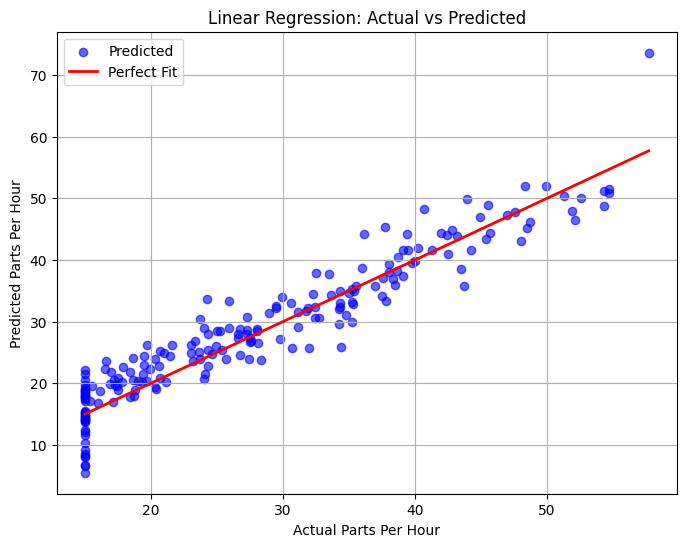

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Parts Per Hour")
plt.ylabel("Predicted Parts Per Hour")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()